In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt

In [4]:
countries_data = pd.read_csv("../Data/Processed/worried_data_processed.csv")

In [2]:
X_PCA = np.load("../Data/Processed/X_PCA.npy")

# Clustering
The main objective of this project is to compare country groups obtained through unsupervised clustering based on Findex data to:
- World Bank classification by income (4 groups),
- Division into Frontier, Emerging, and Developed Markets (3 groups),
- The Economist Democracy Index (4 groups, 10 subgroups).

The World Bank divides countries into four groups, so the aim is to obtain four clusters. The Economist Democracy Index categorizes countries into four main groups based on scores ranging from 0 to 10. The first three groups each have two subgroups, and the last one has four subgroups. Therefore, the aim is not only to obtain four clusters but also to obtain 10 clusters. The division into Frontier, Emerging, and Developed Markets consists of three groups. Additionally, Emerging Markets are sometimes subdivided into various subgroups.

# K-means

In [55]:
K_min = 3
K_max = 21
cluster_no = list(range(K_min, K_max))
wgss = {}
silh_score = {}
neg_silh_score = {}
for K in cluster_no:
    # uses data after PCA with the no of principal components representing 90% of the explained variance
    kmeans = KMeans(n_clusters = K, n_init = 10).fit(X_PCA[:, 0:3])
    wgss[K] = kmeans.inertia_
    silh_score[K] = silhouette_score(X_PCA, kmeans.labels_)
    neg_silh_score[K] = np.sum(silhouette_samples(X_PCA, kmeans.labels_) < 0)

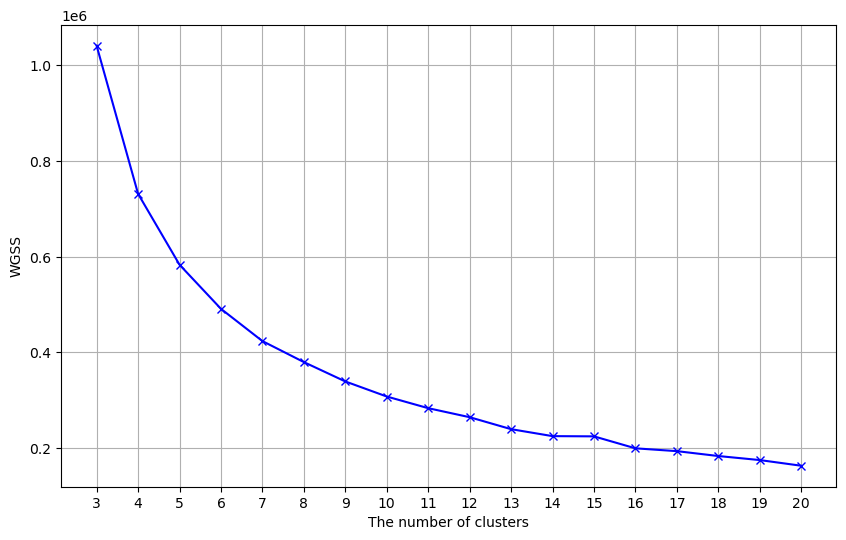

In [56]:
plt.figure(figsize = (10,6))
plt.plot(wgss.keys(), wgss.values(),  "bx-")
plt.xticks(np.arange(K_min, K_max))
plt.xlabel("The number of clusters")
plt.ylabel("WGSS")
plt.grid(True)

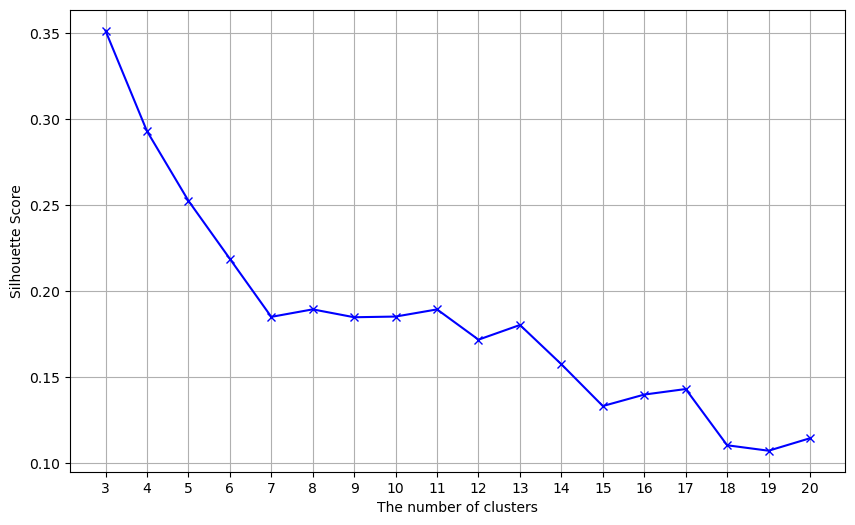

In [57]:
plt.figure(figsize = (10,6))
plt.plot(silh_score.keys(), silh_score.values(),  "bx-")
plt.xticks(np.arange(K_min, K_max))
plt.xlabel("The number of clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)

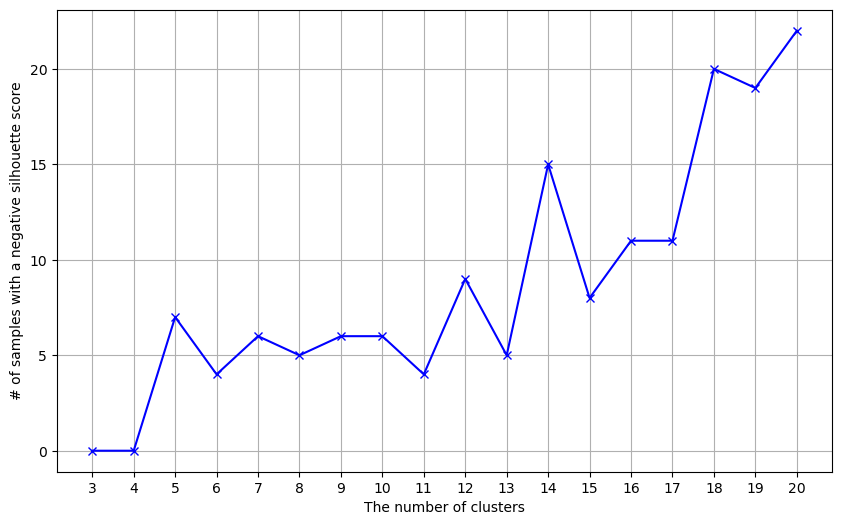

In [58]:
plt.figure(figsize = (10,6))
plt.plot(neg_silh_score.keys(), neg_silh_score.values(),  "bx-")
plt.xticks(np.arange(K_min, K_max))
plt.xlabel("The number of clusters")
plt.ylabel("# of samples with a negative silhouette score")
plt.grid(True)

## Analysis of the Number of Clusters in K-means
Based on the WGSS, silhouette score, and the number of samples with a negative score, dividing the data into 3 or 4 clusters appears to be stable. The WGSS "elbow" occurs at 5 or 6 clusters, while dividing into 10 clusters results in relatively low WGSS, which may indicate unstable clustering.

The "elbow" of the silhouette score occurs around 7 clusters, further suggesting that 3 and 4 clusters provide stable clustering, whereas 10 clusters appear to be an unstable option.

Almost all samples have a positive silhouette score for 3 and 4 clusters, with fewer than 10 samples having a negative silhouette score for 10 clusters (less than 7% of samples).



## The robustness of clusters

In [ ]:
cluster_no = [3, 4, 10]

# DBSCAN